In [1]:
import pandas as pd

In [71]:
df=pd.read_csv('Data_Negara_HELP.csv')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [73]:
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


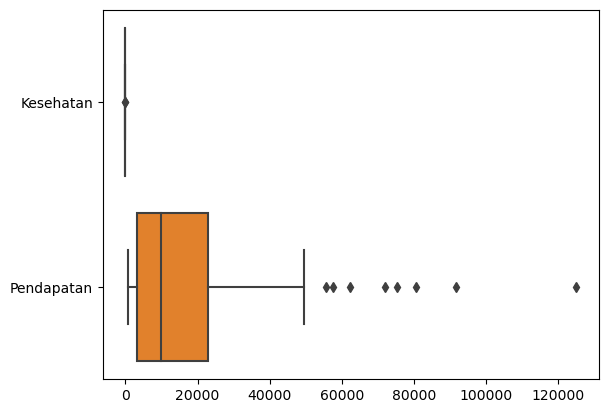

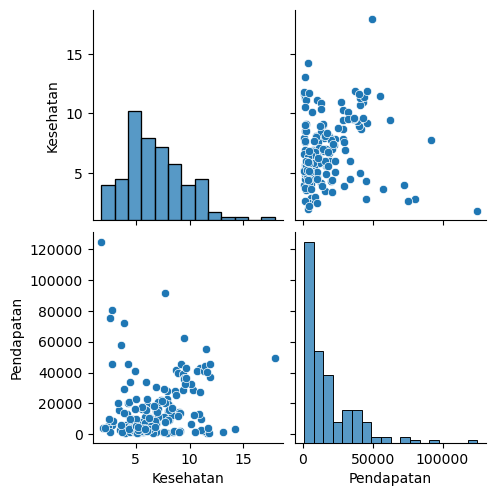

In [76]:
import seaborn as sns
sns.boxplot(df[['Kesehatan', 'Pendapatan']], orient='h')
sns.pairplot(df[['Kesehatan', 'Pendapatan']])

In [77]:
#remove outlier
def finding_outlier(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    Lb=Q1-IQR*1.5
    Ub=Q3+IQR*1.5
    df_final=df[(df<Lb)|(df>Ub)]
    return df_final

In [78]:
def remove_outlier(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    Lb=Q1-IQR*1.5
    Ub=Q3+IQR*1.5
    df_final=df[~((df<Lb)|(df>Ub))]
    return df_final

In [79]:
print(finding_outlier(df['Pendapatan']))
print(finding_outlier(df['Kesehatan']))

23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64
101    14.2
159    17.9
Name: Kesehatan, dtype: float64


In [80]:
df_outliers_removed=remove_outlier(df[['Pendapatan', 'Kesehatan']])
df_outliers_removed.dropna(axis=0, inplace=True)

<Axes: >

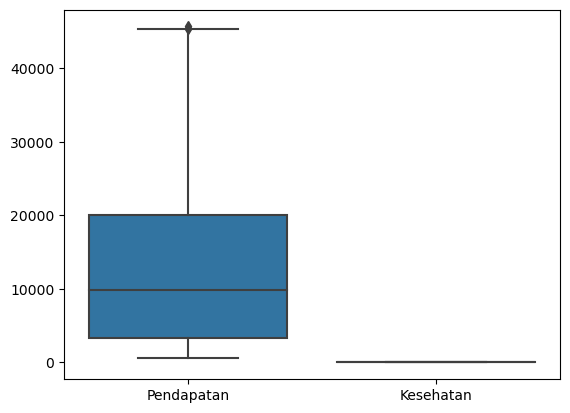

In [84]:
sns.boxplot(df_outliers_removed[['Pendapatan', 'Kesehatan']])

In [88]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_outlier_std = sc.fit_transform(df_outliers_removed.astype(float))

C:\Users\Mohamad Alif\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohamad Alif\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mohamad Alif\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohamad Alif\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

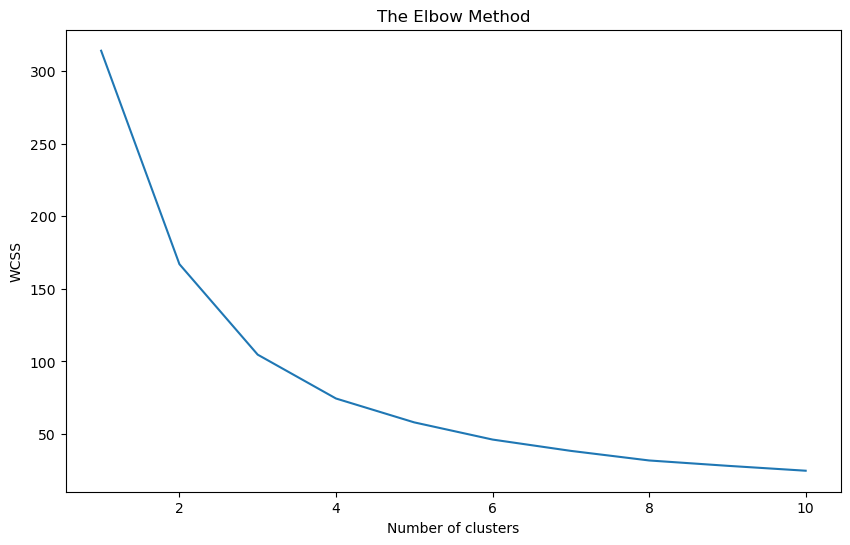

In [93]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.figure(figsize=(10,6))
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_outlier_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [103]:
## Clustering with KMeans
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=4, random_state=42).fit(df_outlier_std)
labels1 = kmeans1.labels_
new_df_outlier_std = pd.DataFrame(data=df_outlier_std, columns = ['Pendapatan', 'Kesehatan'])
new_df_outlier_std['label_kmeans1'] = labels1

C:\Users\Mohamad Alif\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohamad Alif\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


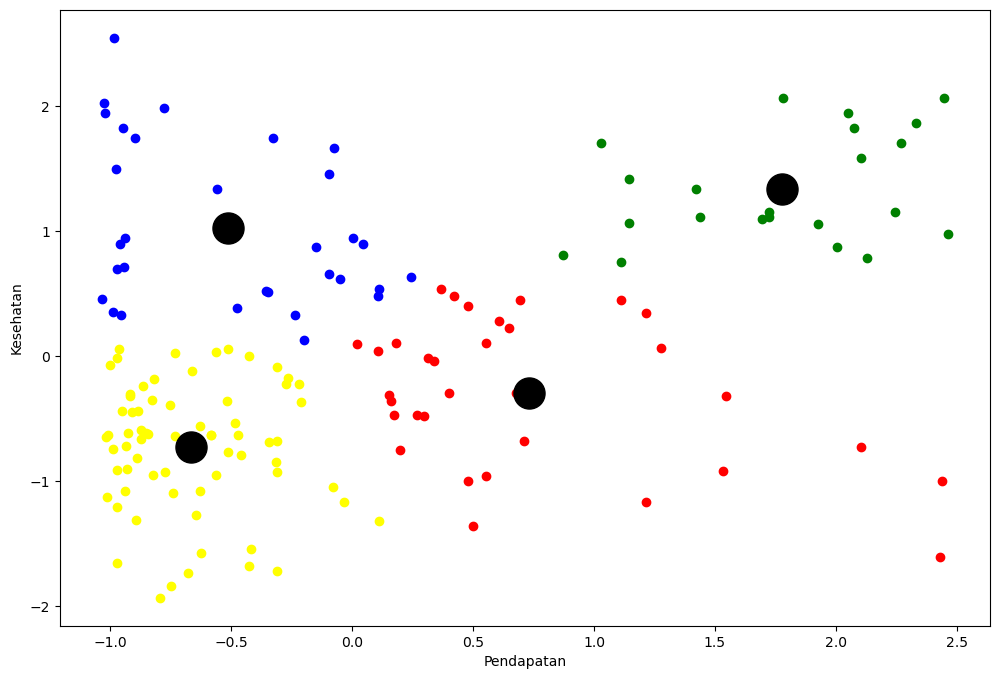

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(new_df_outlier_std.Pendapatan[new_df_outlier_std.label_kmeans1==0], new_df_outlier_std['Kesehatan'][new_df_outlier_std.label_kmeans1==0], c='blue')
plt.scatter(new_df_outlier_std.Pendapatan[new_df_outlier_std.label_kmeans1==1], new_df_outlier_std['Kesehatan'][new_df_outlier_std.label_kmeans1==1], c='red')
plt.scatter(new_df_outlier_std.Pendapatan[new_df_outlier_std.label_kmeans1==2], new_df_outlier_std['Kesehatan'][new_df_outlier_std.label_kmeans1==2], c='green')
plt.scatter(new_df_outlier_std.Pendapatan[new_df_outlier_std.label_kmeans1==3], new_df_outlier_std['Kesehatan'][new_df_outlier_std.label_kmeans1==3], c='yellow')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='k', s=500)
plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.show()

NameError: name 'scatter_akhir' is not defined

In [1]:
print('This is a trial for git.')

This is a trial for git.
